In [124]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [250]:
# read image
file_path = './C1HW05-2022/Image Set 5 - Homework 5 - 2022/HW05-Part 3-04.bmp'
im = cv2.imread(file_path) / 255
img_for_Kmean = im * 255


# matplotlib show image use BGR2RGB

In [251]:
# BGR 2 RGB
def BGR2RGB(img):
    b, g, r = cv2.split(img)
    rgb = cv2.merge([r, g, b])
    return rgb



# Display an image in RGB, CMY, HSI, XYZ, L* a * b *, YUV color planes
|id|plane|
|---|---|
|1|RGB|
|2|CMY|
|3|HSI|
|4|XYZ|
|5|Lab|
|6|YUV|

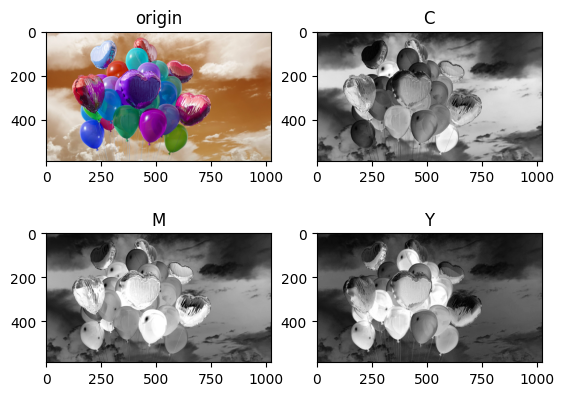

In [252]:
# bgr 介於 0-1
def CMY(r, g, b):
    c = np.ones(r.shape) - r
    m = np.ones(g.shape) - g
    y = np.ones(b.shape) - b
    return c, m, y
C, M, Y = CMY(im[..., 2], im[..., 1], im[..., 0]) 
plt.subplot(2, 2, 1)
plt.title('origin')
plt.imshow(im)
plt.subplot(2, 2, 2)
plt.title('C')
plt.imshow(C, cmap='gray')
plt.subplot(2, 2, 3)
plt.title('M')
plt.imshow(M, cmap='gray')
plt.subplot(2, 2, 4)
plt.title('Y')
plt.imshow(Y, cmap='gray')



In [253]:
print(np.min([1,2]))

1


/var/folders/4f/qpcc_31940v5l8s4q4qv11180000gn/T/ipykernel_43010/2026879608.py:7: RuntimeWarning: invalid value encountered in double_scalars
  theta = np.arccos(0.5 * (r[i, j] - g[i, j] + r[i, j] - b[i, j]) / ((r[i, j] - g[i, j])**2 + (r[i, j] - b[i, j]) * (g[i, j] - b[i, j]))**0.5)
/var/folders/4f/qpcc_31940v5l8s4q4qv11180000gn/T/ipykernel_43010/2026879608.py:7: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos(0.5 * (r[i, j] - g[i, j] + r[i, j] - b[i, j]) / ((r[i, j] - g[i, j])**2 + (r[i, j] - b[i, j]) * (g[i, j] - b[i, j]))**0.5)
/var/folders/4f/qpcc_31940v5l8s4q4qv11180000gn/T/ipykernel_43010/2026879608.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  s[i, j] = 1 - 3 / (r[i, j] + g[i, j] + b[i, j]) * np.min([r[i, j], g[i, j], b[i, j]])
/var/folders/4f/qpcc_31940v5l8s4q4qv11180000gn/T/ipykernel_43010/2026879608.py:12: RuntimeWarning: invalid value encountered in double_scalars
  s[i, j] = 1 - 3 / (r[i, j] + g[i, j] + b[i, j]) * np.min([r[i

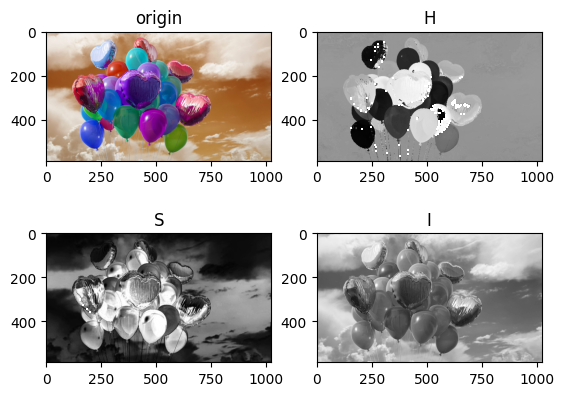

In [254]:
def HSI(r, g, b):
    high, width = r.shape
    h = np.zeros(r.shape)
    s = np.zeros(r.shape)
    for i in range(high):
        for j in range(width):
            theta = np.arccos(0.5 * (r[i, j] - g[i, j] + r[i, j] - b[i, j]) / ((r[i, j] - g[i, j])**2 + (r[i, j] - b[i, j]) * (g[i, j] - b[i, j]))**0.5)
            if (b[i, j] <= g[i, j]):
                h[i, j] = theta
            else:
                h[i, j] = 2 * np.pi - theta
            s[i, j] = 1 - 3 / (r[i, j] + g[i, j] + b[i, j]) * np.min([r[i, j], g[i, j], b[i, j]])

    i = (r + g + b) / 3
    return h, s, i

H, S, I = HSI(im[..., 2], im[..., 1], im[..., 0])
plt.subplot(2, 2, 1)
plt.title('origin')
plt.imshow(im)
plt.subplot(2, 2, 2)
plt.title('H')
plt.imshow(H, cmap='gray')
plt.subplot(2, 2, 3)
plt.title('S')
plt.imshow(S, cmap='gray')
plt.subplot(2, 2, 4)
plt.title('I')
plt.imshow(I, cmap='gray') 

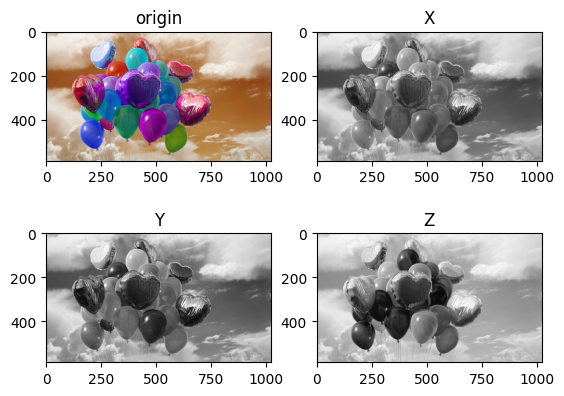

In [255]:
def XYZ(r, g, b):
    h, w = r.shape
    x = np.zeros(r.shape)
    y = np.zeros(r.shape)
    z = np.zeros(r.shape)
    T = np.array([[0.412453, 0.357580, 0.180423],
                  [0.212671, 0.715160, 0.072169],
                  [0.019334, 0.119193, 0.950227]])
    # print(T)
    for i in range(h):
        for j in range(w):
            rgb = np.array([[r[i, j]], [g[i, j]], [b[i, j]]])
            result = np.dot(T, rgb)
            x[i, j] = result[0]
            y[i, j] = result[1]
            z[i, j] = result[2]
    return x, y, z
X, Y, Z = XYZ(im[..., 2], im[..., 1], im[..., 0])
plt.subplot(2, 2, 1)
plt.title('origin')
plt.imshow(im)
plt.subplot(2, 2, 2)
plt.title('X')
plt.imshow(X, cmap='gray')
plt.subplot(2, 2, 3)
plt.title('Y')
plt.imshow(Y, cmap='gray')
plt.subplot(2, 2, 4)
plt.title('Z')
plt.imshow(Z, cmap='gray') 


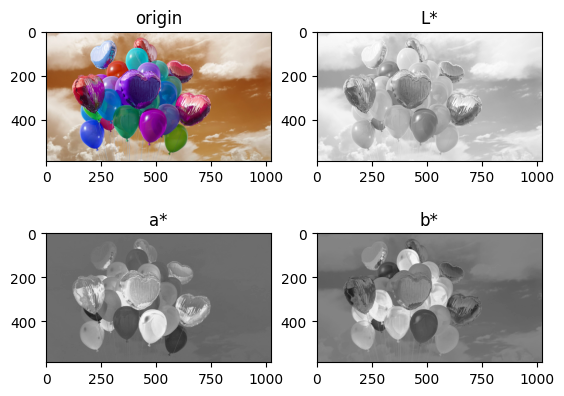

In [256]:
def Lab(r, g, b):
    def h(q):
        if (q > 0.008856):
            return q**(1/3)
        else:
            return 7.787 * q + 16 / 116
    X, Y, Z = XYZ(r, g, b)
    L = np.zeros(X.shape)
    a = np.zeros(X.shape)
    b = np.zeros(X.shape)
    high, width = X.shape
    
    for i in range(high):
        for j in range(width):
            L[i, j] = 116 * h(Y[i, j] / 0.333) - 16
            a[i, j] = 500 * (h(X[i, j] / 0.333) - h(Y[i, j] / 0.333))
            b[i, j] = 200 * (h(Y[i, j] / 0.333) - h(Z[i, j] / 0.333))
    return L, a, b
L_s, a_s, b_s = Lab(im[..., 2], im[..., 1], im[..., 0])
plt.subplot(2, 2, 1)
plt.title('origin')
plt.imshow(im)
plt.subplot(2, 2, 2)
plt.title('L*')
plt.imshow(L_s, cmap='gray')
plt.subplot(2, 2, 3)
plt.title('a*')
plt.imshow(a_s, cmap='gray')
plt.subplot(2, 2, 4)
plt.title('b*')
plt.imshow(b_s, cmap='gray') 


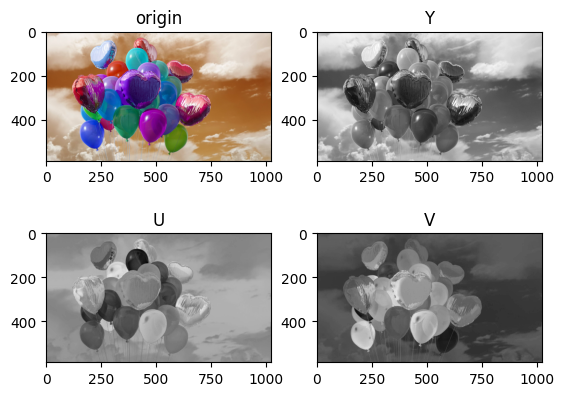

In [257]:
def YUV(r, g, b):
    h, w = r.shape
    y = np.zeros(r.shape)
    u = np.zeros(r.shape)
    v = np.zeros(r.shape)
    T = np.array([[0.257, 0.504, 0.098],
                  [-0.148, -0.291, 0.439],
                  [0.439, -0.368, -0.071]])
    # print(T)
    for i in range(h):
        for j in range(w):
            rgb = np.array([[r[i, j]], [g[i, j]], [b[i, j]]])
            result = np.dot(T, rgb) + np.array([[16], [128], [128]])
            y[i, j] = result[0]
            u[i, j] = result[1]
            v[i, j] = result[2]
    return y, u, v
Y, U, V = YUV(im[..., 2], im[..., 1], im[..., 0])
plt.subplot(2, 2, 1)
plt.title('origin')
plt.imshow(im)
plt.subplot(2, 2, 2)
plt.title('Y')
plt.imshow(Y, cmap='gray')
plt.subplot(2, 2, 3)
plt.title('U')
plt.imshow(U, cmap='gray')
plt.subplot(2, 2, 4)
plt.title('V')
plt.imshow(V, cmap='gray') 

# Kmeans 
#### image value is between 0 and 255

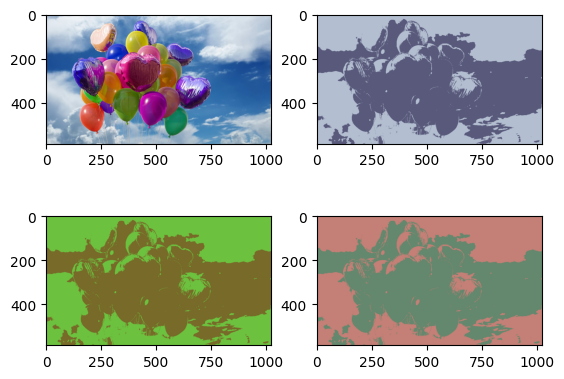

In [258]:
im = im * 255

def Kmeans(img, K):
    # show_type = 1 : RGB
    # show_type = 2 : HSI
    # show_type = 3 : Lab
    Z = img.reshape((-1,3)) # 將每一通道從2D變成1D
    # convert to np.float32
    Z = np.float32(Z)
    # define criteria, number of clusters(K) and apply kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    # Now convert back into uint8, and make original image
    center = np.uint8(center)
    res = center[label.flatten()]
    res_BGR = res.reshape((img.shape))
    res_HSI = cv2.cvtColor(res_BGR, cv2.COLOR_BGR2HLS)   
    res_LAB = cv2.cvtColor(res_BGR, cv2.COLOR_BGR2LAB)   
    return res_BGR, res_HSI, res_LAB

BGR, HSI, LAB = Kmeans(img_for_Kmean, 2)
plt.subplot(2, 2, 1)
plt.imshow(BGR2RGB(img_for_Kmean / 255))
plt.subplot(2, 2, 2)
plt.imshow(BGR2RGB(BGR))
plt.subplot(2, 2, 3)
plt.imshow(HSI)
plt.subplot(2, 2, 4)
plt.imshow(LAB)




256


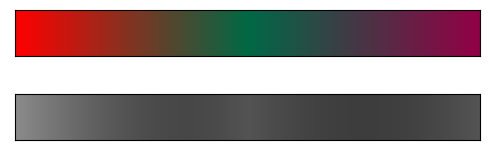

In [259]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib as mpl
gray = cv2.imread('./C1HW05-2022/Image Set 5 - Homework 5 - 2022/HW05-Part 2-01.bmp', 0)

colorarray=[[1, 0,     0 ,1 ],[0, 0.4116,     0.27107143 ,1 ],[.57647055, 0,     0.27107143 ,1 ]]
Cmap = LinearSegmentedColormap.from_list('testCmap', colors=colorarray, N=256)

def grayscale_cmap(cmap):
    """Return a grayscale version of the given colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # convert RGBA to perceived grayscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
        
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)
    

def view_colormap(cmap):
    """Plot a colormap with its grayscale equivalent"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    print(len(colors))
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6, 2),
                           subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

view_colormap(Cmap)
# plt.imshow(gray, image_bgr)
# plt.colorbar()


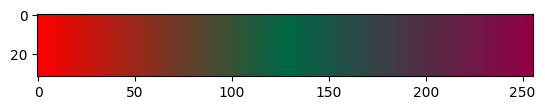

In [275]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

gray = cv2.imread('./C1HW05-2022/Image Set 5 - Homework 5 - 2022/HW05-Part 2-01.bmp', 0)
# 填入RGBA（0-1）
colorarray=[[1, 0, 0 ,1 ], [0, 0.4116, 0.27107143 ,1 ], [.57647055, 0, 0.27107143 ,1 ]]
Cmap = LinearSegmentedColormap.from_list('myCmap', colors = colorarray, N = 256)
# get cmap array
cmap = plt.cm.get_cmap(Cmap)
colors = cmap(np.arange(cmap.N))
color_img = np.ones((32, 256, 3))
for k in range(3):
    for i in range(32):
        for j in range(256):
            color_img[i , j, k] = colors[j][k] * 255

color_img = cv2.cvtColor(color_img.astype('uint8'), cv2.COLOR_RGB2BGR)

plt.imshow(cv2.cvtColor(color_img.astype('uint8'), cv2.COLOR_BGR2RGB))

R = np.ones(gray.shape)
G = np.ones(gray.shape)
B = np.ones(gray.shape)
h, w =gray.shape
for i in range(h):
    for j in range(w):
        R[i, j] = colors[gray[i, j]][0]
        G[i, j] = colors[gray[i, j]][1]
        B[i, j] = colors[gray[i, j]][2]
RGB = cv2.merge((R, G, B))
# plt.subplot(2, 1, 1)
# plt.imshow(RGB)
# plt.colorbar()
# plt.subplot(2, 1, 2)
# plt.imshow(gray, cmap=Cmap)
# plt.colorbar()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


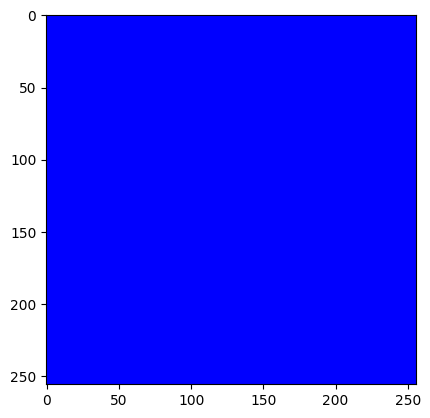

In [276]:
H = np.ones((256, 256)) * 0
S = np.ones((256, 256)) * 100
V = np.ones((256, 256)) * 100
HSV1 = cv2.merge((H,S,V)).astype('float32')
H = np.ones((256, 256)) * 220
S = np.ones((256, 256)) * 100
V = np.ones((256, 256)) * 100
HSV2 = cv2.merge((H,S,V)).astype('float32')

BGR = cv2.cvtColor(HSV2, cv2.COLOR_HSV2BGR)

plt.imshow(BGR2RGB(BGR))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


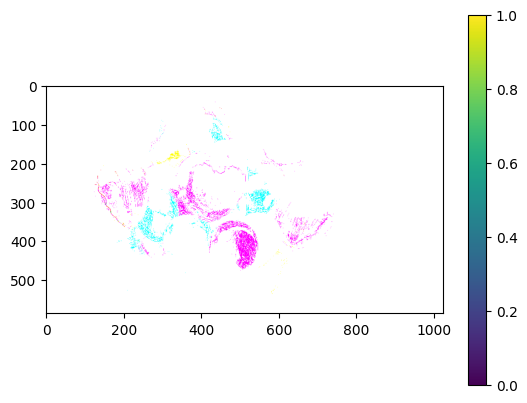

In [277]:
plt.imshow(im)
plt.colorbar()
plt.show()